In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats

# Database connection details
DB_NAME = "student_mental_health"
DB_USER = "postgres"
DB_PASSWORD = "1234"
DB_HOST = "localhost"
DB_PORT = "5432"

# Create database engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Query to load data from the table
query = "SELECT * FROM student_mental_health"

# Load data into pandas DataFrame
df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
print(df.head())

# You can now perform further analysis on the DataFrame
# For example, let's get some basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# # Example: Count the number of students with depression
# depression_count = df['Do_you_have_Depression?'].value_counts()
# print(depression_count)

df = df.dropna(how='any',axis=0)
print(df.isnull().sum())



        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes  

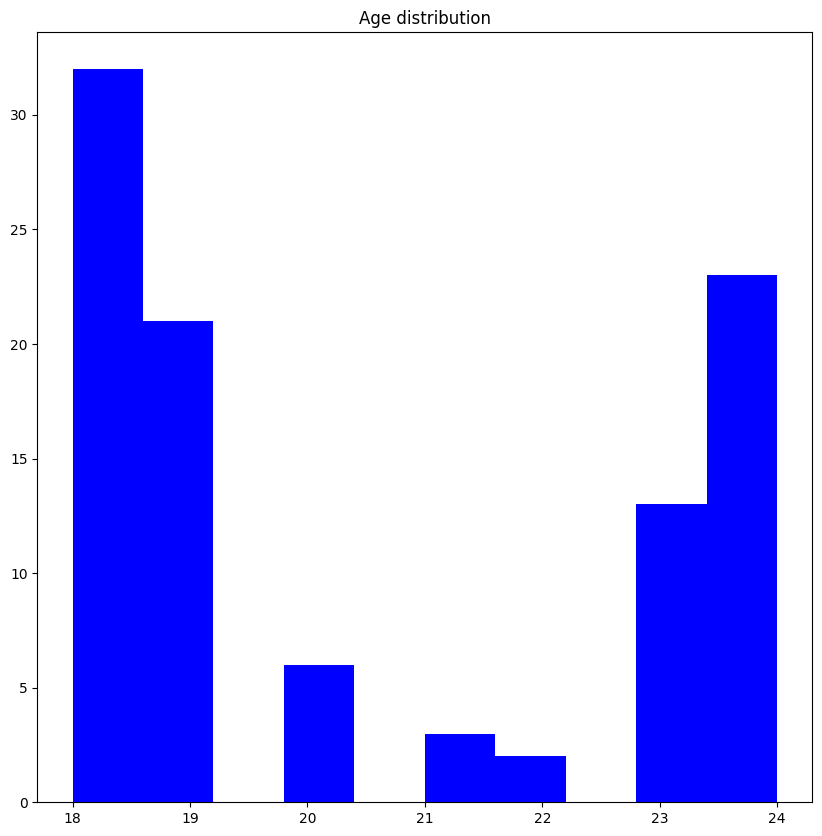

In [5]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='b')
plt.title("Age distribution");

In [8]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

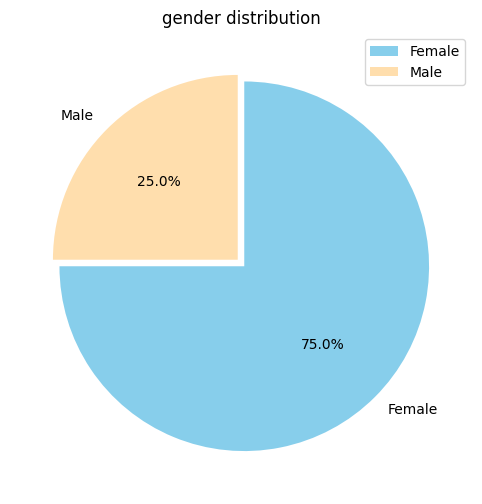

In [9]:
plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

In [10]:
df['gender']

0      Female
1        Male
2        Male
3      Female
4        Male
        ...  
96     Female
97       Male
98     Female
99     Female
100      Male
Name: gender, Length: 100, dtype: object

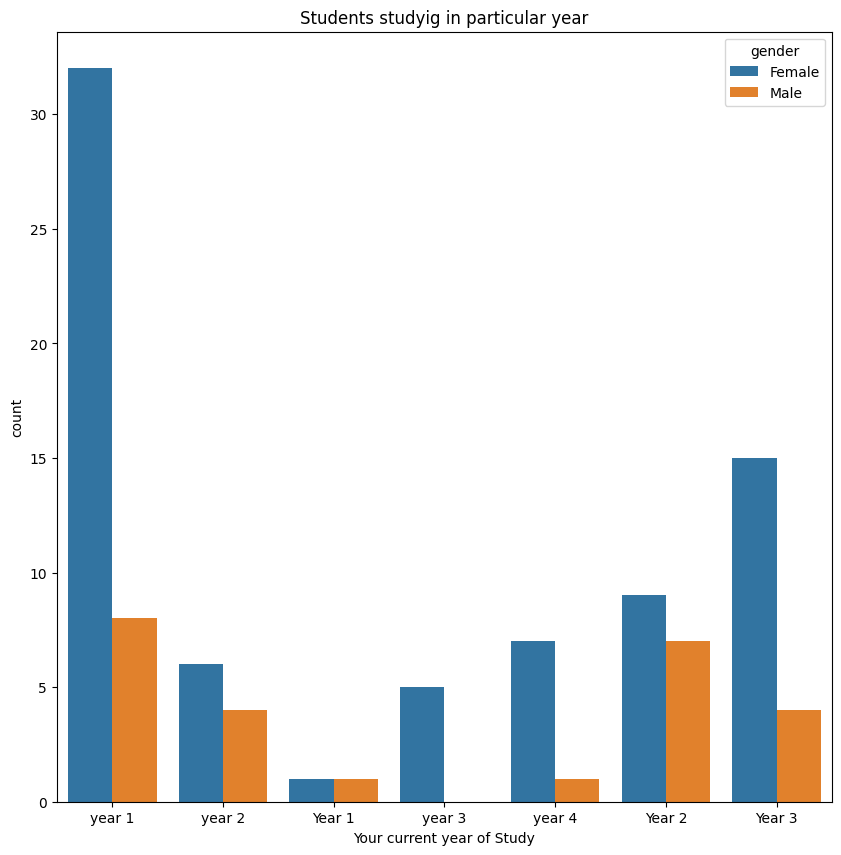

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Your current year of Study', hue='gender')
plt.title("Students studyig in particular year");

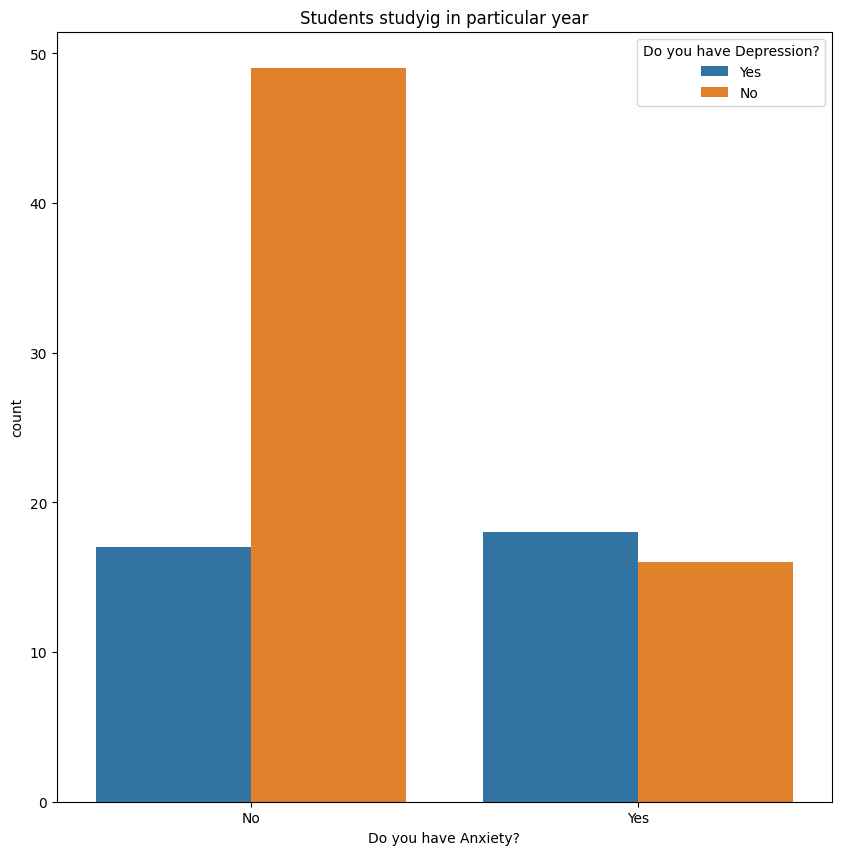

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Do you have Anxiety?',hue='Do you have Depression?')
plt.title("Students studyig in particular year");
plt.show()

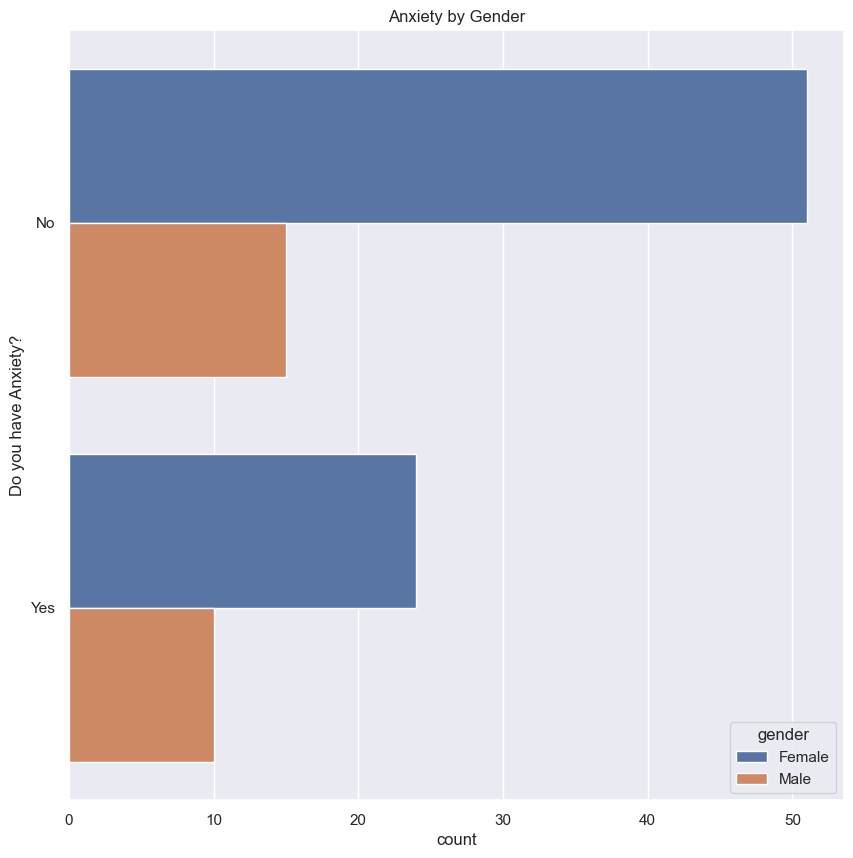

In [13]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=df)
plt.title("Anxiety by Gender")
plt.show()

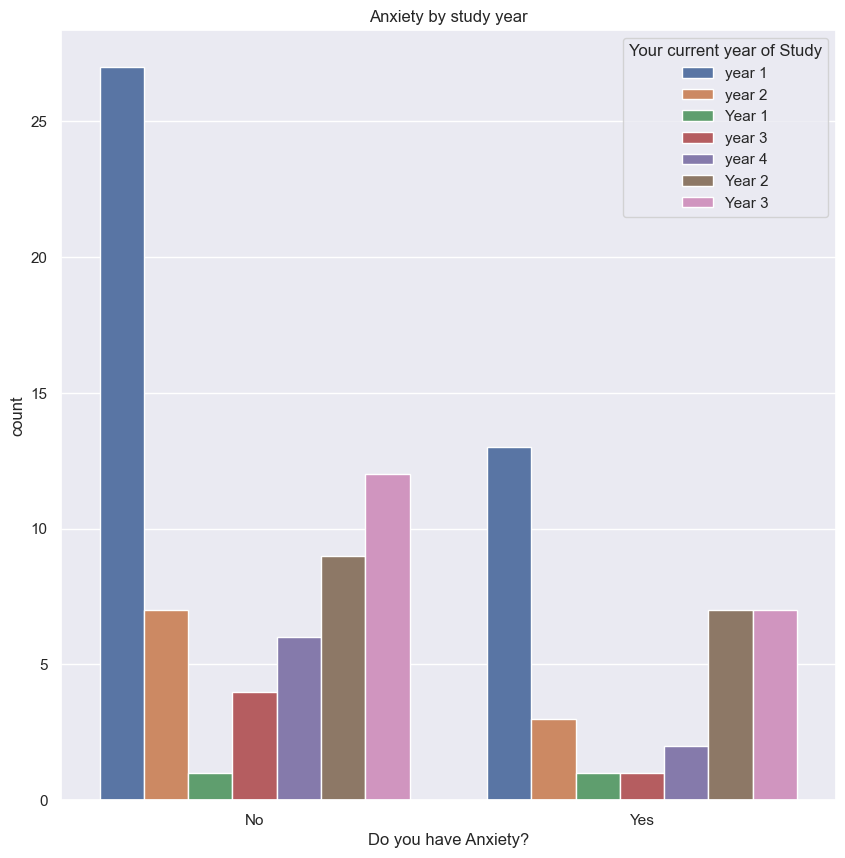

In [14]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()


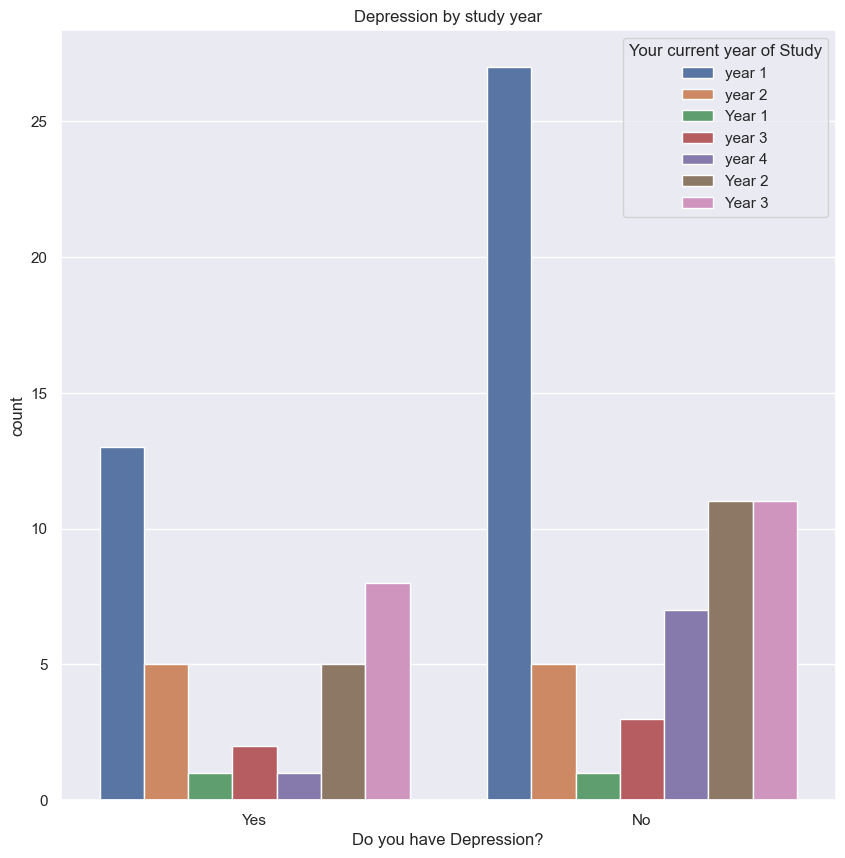

In [15]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)
plt.title("Depression by study year")
plt.show()

##### Usage of Lists

In [26]:
filtered_df = df[(df['What is your course?'] == 'Engineering') & (df['Do you have Anxiety?'] == 'Yes') & (df['Do you have Depression?'] == 'Yes')]
filtered_entries = filtered_df.values.tolist()
filtered_entries

list

### P-Value Analysis
###### We wanted to calculate a p-value between two columns but we only had the age column that is numeric.
###### In order to create a second column that is numeric we took the 'What is your CGPA' Column and through a lambda function we calculated the mean value of the two string values
###### After that we changed the 'What is your CGPA' to a float 
###### In the correlations analysis we compare the age and the cgpa of a student. The result is a very high p-value which indicates between this two variables there is no statistical significant correlation

In [6]:
# Calculate the mean value between the two values in the 'What is your CGPA?' column
df['What is your CGPA?'] = df['What is your CGPA?'].apply(lambda x: (float(x.split('-')[0].strip()) + float(x.split('-')[1].strip())) / 2)

# Change the type of the column to float
df['What is your CGPA?'] = df['What is your CGPA?'].astype(float)



# Calculate the correlation and p-value
correlation, p_value = pearsonr(df['Age'], df['What is your CGPA?'])

# Print the correlation and p-value
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.00561008761560407
P-value: 0.955823000733376


In [4]:
# Statistical analysis: Chi-square test for independence between Anxiety and Depression
contingency_table = pd.crosstab(df['Do you have Anxiety?'], df['Do you have Depression?'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test results:\nChi2: {chi2}\nP-value: {p}\nDegrees of freedom: {dof}")

Chi-square test results:
Chi2: 6.142876731112027
P-value: 0.013194249179498846
Degrees of freedom: 1
